# Rezolvarea problemei (pt datele v2)

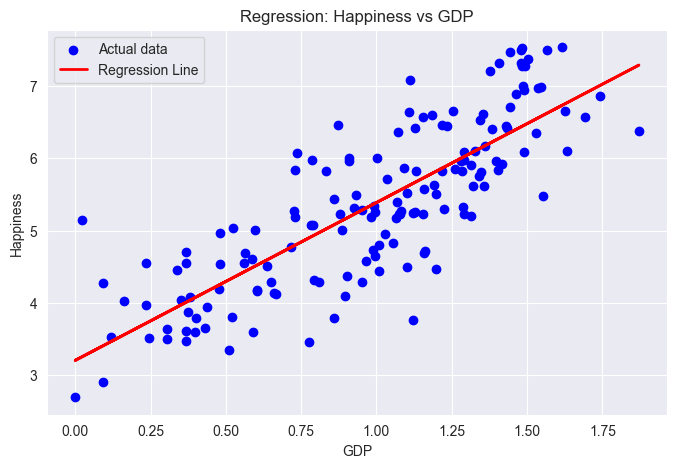

Model for Happiness vs GDP:
Slope: 2.1841849464151215
Intercept: 3.2032126827021083
Mean Squared Error: 0.4321505672638404
R-squared Score: 0.66010547608777


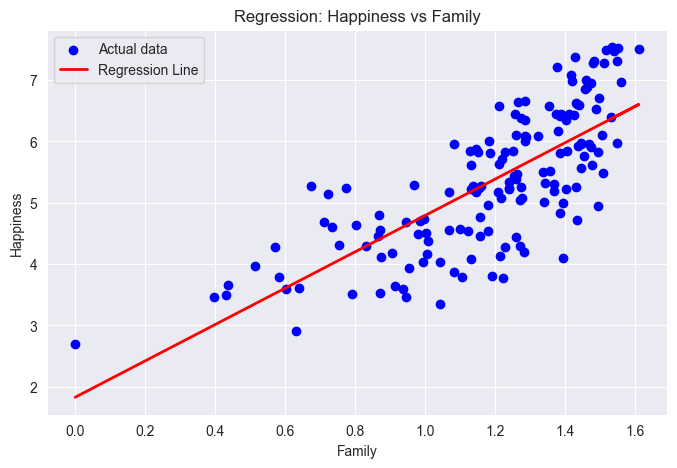

Model for Happiness vs Family:
Slope: 2.9642475156757198
Intercept: 1.829832152567297
Mean Squared Error: 0.5510199236253973
R-squared Score: 0.5666124985265549


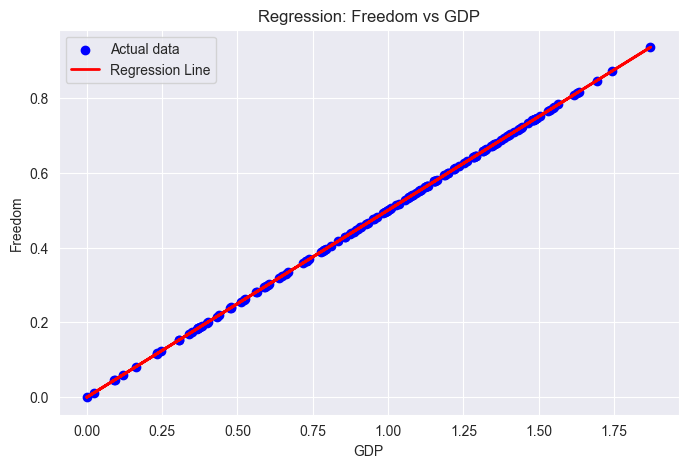

Model for Freedom vs GDP:
Slope: 0.49999999999857636
Intercept: 2.0756924494625927e-11
Mean Squared Error: 1.222056779288658e-19
R-squared Score: 1.0

Intercept: 2.34005289972309
Slope for GDP: -2727.251157243525
Slope for Freedom: 5459.532892432369
Mean Squared Error: 0.7399301773027684
R-squared Score: 0.41803104196998686


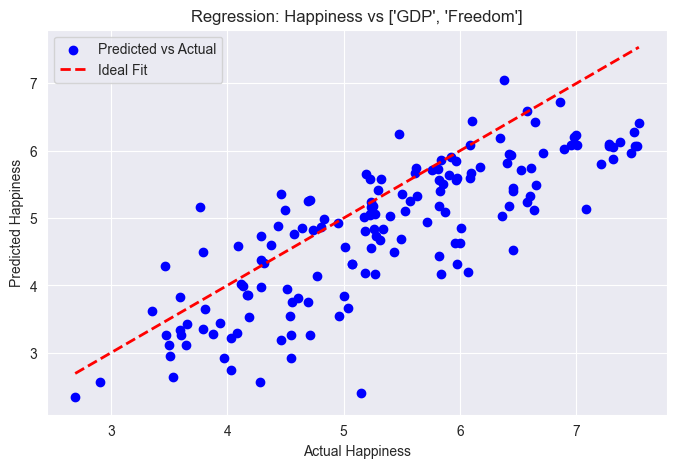

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/v2_world-happiness-report-2017.csv"
df = pd.read_csv(file_path)

features = {
    "GDP": "Economy..GDP.per.Capita.",
    "Family": "Family",
    "Freedom": "Freedom",
    "Happiness": "Happiness.Score"
}

def least_squares_regression(x_feature, y_feature):
    X = df[features[x_feature]].values
    y = df[features[y_feature]].values
    
    n = len(X)
    sum_x = sum(X)
    sum_y = sum(y)
    sum_xy = sum(X * y)
    sum_x2 = sum(X * X)
    
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    intercept = (sum_y - slope * sum_x) / n
    
    y_pred = [slope * xi + intercept for xi in X]
    
    mse = sum((yi - y_hat) ** 2 for yi, y_hat in zip(y, y_pred)) / n
    
    mean_y = sum_y / n
    ss_total = sum((yi - mean_y) ** 2 for yi in y)
    ss_residual = sum((yi - y_hat) ** 2 for yi, y_hat in zip(y, y_pred))
    r2 = 1 - (ss_residual / ss_total)
    
    plt.figure(figsize=(8,5))
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Regression: {y_feature} vs {x_feature}')
    plt.legend()
    plt.show()
    
    print(f"Model for {y_feature} vs {x_feature}:")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}\n")

def multiple_linear_regression(x_features, y_feature):
    X = df[[features[x] for x in x_features]].values
    y = df[features[y_feature]].values
    
    X = np.c_[np.ones(X.shape[0]), X]
    
    coef = np.linalg.inv(X.T @ X) @ X.T @ y
    
    intercept = coef[0]
    slopes = coef[1:]
    
    print(f"Intercept: {intercept}")
    for i, feature in enumerate(x_features):
        print(f"Slope for {feature}: {slopes[i]}")
    
    y_pred = X @ coef
    
    mse = np.mean((y - y_pred) ** 2)
    
    mean_y = np.mean(y)
    ss_total = np.sum((y - mean_y) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}\n")
    
    plt.figure(figsize=(8,5))
    plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2, linestyle='dashed', label='Ideal Fit')
    plt.xlabel(f'Actual {y_feature}')
    plt.ylabel(f'Predicted {y_feature}')
    plt.title(f'Regression: {y_feature} vs {x_features}')
    plt.legend()
    plt.show()

least_squares_regression("GDP", "Happiness")
least_squares_regression("Family", "Happiness")
least_squares_regression("GDP", "Freedom")
multiple_linear_regression(["GDP", "Freedom"], "Happiness")